# Part - 1

| Student Status |    Count    |    pi    | -pilog2(pi) |
| -------------- | ----------- | -------- | ----------- |
| Undergrad      |     45      |   0.45   |   0.5184    | 
| Grad           |     55      |   0.55   |   0.4741    |
| Total          |     100     |          |   0.9925    |

| Stress Level |   Count     |    pj    | -pjlog2(pj) |
| ------------ | ----------- | -------- | ----------- |
| High         |    35       |   0.35   |   0.53      | 
| Medium       |    50       |   0.50   |   0.50      |
| Low          |    15       |   0.15   |   0.41      |
| Total        |    100      |          |   1.44      |

| Student Status | Stress Level |   Count  |    pij   | -pijlog2(pij) |
| ------------   | -----------  | -------- | -------- | ------------- |
|  Undergrad     | High         |    5     |   0.05   |   0.216       | 
|  Undergrad     | Medium       |    30    |   0.30   |   0.520       |
|  Undergrad     | Low          |    10    |   0.10   |   0.332       |
|  Grad          | High         |    30    |   0.30   |   0.520       |
|  Grad          | Medium       |    20    |   0.20   |   0.464       |
|  Grad          | Low          |    5     |   0.05   |   0.216       |
|  Total         |              |    100   |          |   2.268       |

                            Here, H(X) = 0.9925       H(Y) = 1.44          H(X,Y) = 2.268

                            I(X,Y) = H(X) + H(Y) - H(X,Y)

                            I(X,Y) = 0.9925 + 1.44 - 2.268

                            I(X,Y) = 0.1645

                            The value of Mutual Information is 0.1645

# Part - 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

print(df_wine.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [4]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [6]:
cov_mat

array([[ 1.00813008,  0.2016416 ,  0.30658143, -0.06030917, -0.30124242,
        -0.41221162,  0.36616593, -0.19190146,  0.30749173, -0.54992807,
        -0.39352761, -0.20253906],
       [ 0.2016416 ,  1.00813008,  0.44971971,  0.18321413,  0.12235533,
         0.06130256,  0.18655693, -0.02607834,  0.24555355, -0.10928021,
        -0.01820002,  0.15948032],
       [ 0.30658143,  0.44971971,  1.00813008, -0.08930998, -0.37018442,
        -0.41804463,  0.40212108, -0.25765667, -0.03090225, -0.25313262,
        -0.28934372, -0.48504311],
       [-0.06030917,  0.18321413, -0.08930998,  1.00813008,  0.16513295,
         0.14458703, -0.30763563,  0.27228619,  0.1260674 ,  0.05792599,
         0.01596134,  0.31461066],
       [-0.30124242,  0.12235533, -0.37018442,  0.16513295,  1.00813008,
         0.88119961, -0.45396901,  0.6196806 , -0.06935051,  0.45718802,
         0.72214462,  0.56326772],
       [-0.41221162,  0.06130256, -0.41804463,  0.14458703,  0.88119961,
         1.00813008, -

In [7]:
eigen_vals

array([4.81330538, 1.93983315, 1.40080921, 0.97138   , 0.80990699,
       0.59025515, 0.50623622, 0.08492038, 0.31527124, 0.17852104,
       0.23995522, 0.24716698])

In [8]:
eigen_vecs

array([[-0.25625253, -0.26200047, -0.10646468,  0.2583145 , -0.55497537,
         0.14572966, -0.61738903,  0.02254516,  0.25187906, -0.01029238,
        -0.08747617, -0.07426924],
       [-0.04358167, -0.39376443, -0.60470142, -0.04793489,  0.32042975,
         0.15792186, -0.03972892, -0.10408464, -0.20600076, -0.02991902,
        -0.45350616,  0.29336463],
       [-0.25004433,  0.01661097, -0.59912362, -0.16990754, -0.06258293,
         0.08570294,  0.32133371,  0.06560573,  0.40901856,  0.0815409 ,
         0.48662842, -0.14075094],
       [ 0.11261336, -0.34855056,  0.03297467, -0.79323821, -0.15396906,
        -0.19566274, -0.21969424,  0.09180492, -0.22142985, -0.07490168,
         0.11548532, -0.2210298 ],
       [ 0.38666269, -0.16769349, -0.15440774,  0.24564265, -0.05326493,
         0.0173353 ,  0.02297192, -0.42926997, -0.22734508,  0.48137297,
         0.09651439, -0.50747411],
       [ 0.42500892, -0.07377778, -0.13201636,  0.1673688 , -0.04211422,
         0.07722997,  

In [9]:
df = pd.DataFrame(cov_mat)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.008130,0.201642,0.306581,-0.060309,-0.301242,-0.412212,0.366166,-0.191901,0.307492,-0.549928,-0.393528,-0.202539
1,0.201642,1.008130,0.449720,0.183214,0.122355,0.061303,0.186557,-0.026078,0.245554,-0.109280,-0.018200,0.159480
2,0.306581,0.449720,1.008130,-0.089310,-0.370184,-0.418045,0.402121,-0.257657,-0.030902,-0.253133,-0.289344,-0.485043
3,-0.060309,0.183214,-0.089310,1.008130,0.165133,0.144587,-0.307636,0.272286,0.126067,0.057926,0.015961,0.314611
4,-0.301242,0.122355,-0.370184,0.165133,1.008130,0.881200,-0.453969,0.619681,-0.069351,0.457188,0.722145,0.563268
5,-0.412212,0.061303,-0.418045,0.144587,0.881200,1.008130,-0.583300,0.665990,-0.191837,0.583319,0.802058,0.557594
6,0.366166,0.186557,0.402121,-0.307636,-0.453969,-0.583300,1.008130,-0.353940,0.154513,-0.317822,-0.493793,-0.364566
7,-0.191901,-0.026078,-0.257657,0.272286,0.619681,0.665990,-0.353940,1.008130,-0.070181,0.322822,0.510366,0.355521
8,0.307492,0.245554,-0.030902,0.126067,-0.069351,-0.191837,0.154513,-0.070181,1.008130,-0.523954,-0.451658,0.316055
9,-0.549928,-0.109280,-0.253133,0.057926,0.457188,0.583319,-0.317822,0.322822,-0.523954,1.008130,0.600226,0.245279


In [11]:
df.style.background_gradient(cmap='rainbow', axis=None)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.008130,0.201642,0.306581,-0.060309,-0.301242,-0.412212,0.366166,-0.191901,0.307492,-0.549928,-0.393528,-0.202539
1,0.201642,1.008130,0.449720,0.183214,0.122355,0.061303,0.186557,-0.026078,0.245554,-0.109280,-0.018200,0.159480
2,0.306581,0.449720,1.008130,-0.089310,-0.370184,-0.418045,0.402121,-0.257657,-0.030902,-0.253133,-0.289344,-0.485043
3,-0.060309,0.183214,-0.089310,1.008130,0.165133,0.144587,-0.307636,0.272286,0.126067,0.057926,0.015961,0.314611
4,-0.301242,0.122355,-0.370184,0.165133,1.008130,0.881200,-0.453969,0.619681,-0.069351,0.457188,0.722145,0.563268
5,-0.412212,0.061303,-0.418045,0.144587,0.881200,1.008130,-0.583300,0.665990,-0.191837,0.583319,0.802058,0.557594
6,0.366166,0.186557,0.402121,-0.307636,-0.453969,-0.583300,1.008130,-0.353940,0.154513,-0.317822,-0.493793,-0.364566
7,-0.191901,-0.026078,-0.257657,0.272286,0.619681,0.665990,-0.353940,1.008130,-0.070181,0.322822,0.510366,0.355521
8,0.307492,0.245554,-0.030902,0.126067,-0.069351,-0.191837,0.154513,-0.070181,1.008130,-0.523954,-0.451658,0.316055
9,-0.549928,-0.109280,-0.253133,0.057926,0.457188,0.583319,-0.317822,0.322822,-0.523954,1.008130,0.600226,0.245279


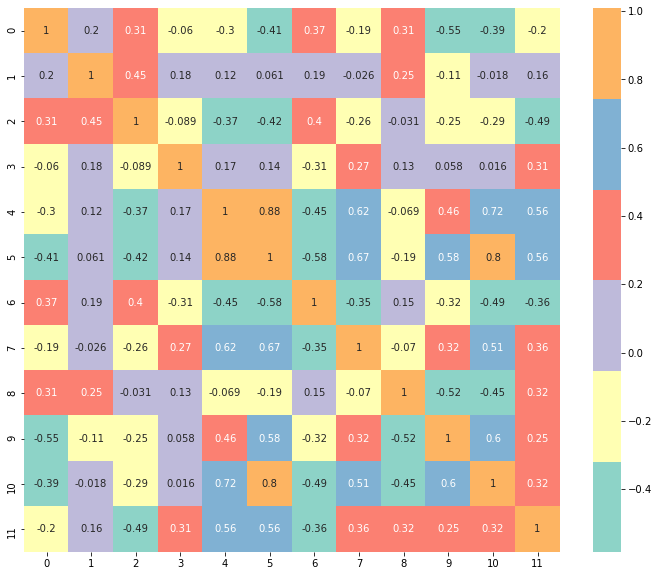

In [12]:
import seaborn as sns 
plt.figure(figsize=(12,10))
cmap = sns.mpl_palette("Set3")
map = sns.heatmap(df,annot=True,cmap=cmap)

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>,
        <AxesSubplot:xlabel='4', ylabel='0'>,
        <AxesSubplot:xlabel='5', ylabel='0'>,
        <AxesSubplot:xlabel='6', ylabel='0'>,
        <AxesSubplot:xlabel='7', ylabel='0'>,
        <AxesSubplot:xlabel='8', ylabel='0'>,
        <AxesSubplot:xlabel='9', ylabel='0'>,
        <AxesSubplot:xlabel='10', ylabel='0'>,
        <AxesSubplot:xlabel='11', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>,
        <AxesSubplot:xlabel='3', ylabel='1'>,
        <AxesSubplot:xlabel='4', ylabel='1'>,
        <AxesSubplot:xlabel='5', ylabel='1'>,
        <AxesSubplot:xlabel='6', ylabel='1'>,
        <AxesSubplot:xlabel='7', ylabel='1'>,
        <AxesSubplot:xlabel='8', ylabel='1'>,
        <AxesSubplot:xlabel='9'

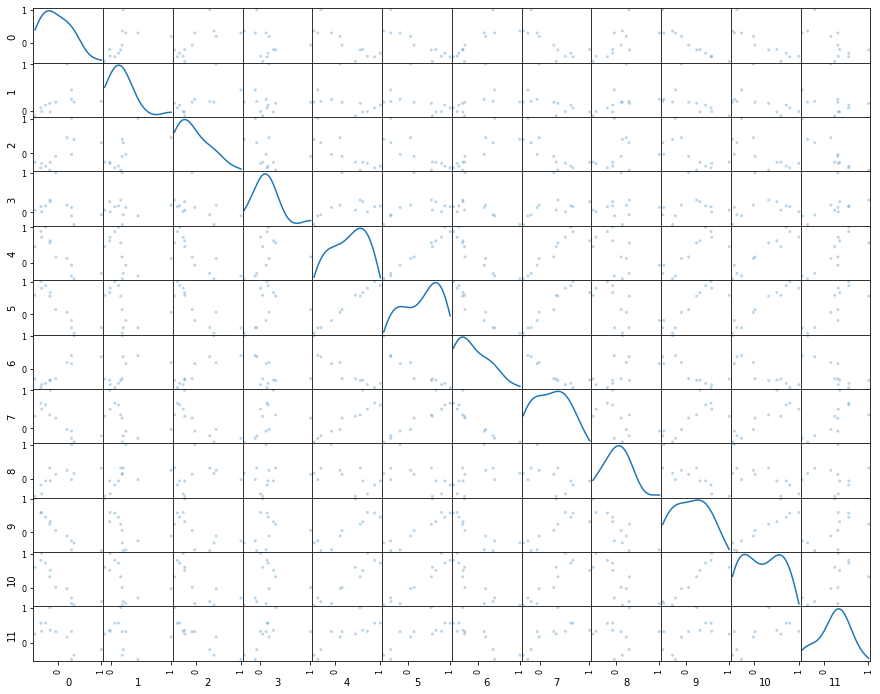

In [13]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (15,12), diagonal = 'kde')